In [285]:
import pandas as pd
import numpy as np
import numpy.random as ra
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [ ]:
df1 = pd.read_csv("synthetic_games_data.csv")
df1.head()

,lines,volatility,hitrate,theme,rating
0,20,1,5,sequence,6
1,20,3,5,casual,7
2,20,5,2,magic,6
3,10,3,2,asian,1
4,243,1,5,asian,7


In [287]:
df1.shape

(500, 5)

In [288]:
df1.groupby('theme')['theme'].agg('count')

theme
asian       102
casual      197
magic        43
sequence    158
Name: theme, dtype: int64

In [289]:
df1.isnull().sum()

lines         0
volatility    0
hitrate       0
theme         0
rating        0
dtype: int64

In [290]:
df1['lines'].unique()

array([    20,     10,    243, 117649,     50,     30,     40])

In [291]:
df1[df1.lines > 117000]

,lines,volatility,hitrate,theme,rating
7,117649,2,3,asian,6
8,117649,3,5,sequence,9
21,117649,2,3,sequence,3
34,117649,1,5,magic,8
36,117649,2,5,casual,4
...,...,...,...,...,...
451,117649,1,3,casual,6
454,117649,1,4,casual,6
472,117649,5,1,casual,10
492,117649,4,1,asian,6


In [292]:
mega_ways_games = df1[df1.lines >= 117649]
mega_ways_games

,lines,volatility,hitrate,theme,rating
7,117649,2,3,asian,6
8,117649,3,5,sequence,9
21,117649,2,3,sequence,3
34,117649,1,5,magic,8
36,117649,2,5,casual,4
...,...,...,...,...,...
451,117649,1,3,casual,6
454,117649,1,4,casual,6
472,117649,5,1,casual,10
492,117649,4,1,asian,6


In [293]:
ways_games = df1[df1.lines == 243]
ways_games

,lines,volatility,hitrate,theme,rating
4,243,1,5,asian,7
5,243,2,1,casual,5
6,243,3,5,asian,10
11,243,3,1,casual,5
16,243,3,4,casual,6
...,...,...,...,...,...
486,243,1,2,sequence,4
487,243,1,3,asian,6
489,243,1,5,casual,8
490,243,4,5,casual,6


In [294]:
lines_games = df1[df1.lines < 243]
lines_games

,lines,volatility,hitrate,theme,rating
0,20,1,5,sequence,6
1,20,3,5,casual,7
2,20,5,2,magic,6
3,10,3,2,asian,1
9,20,2,3,casual,8
...,...,...,...,...,...
494,20,5,3,casual,6
496,30,1,4,sequence,6
497,50,4,4,sequence,5
498,10,2,5,casual,9


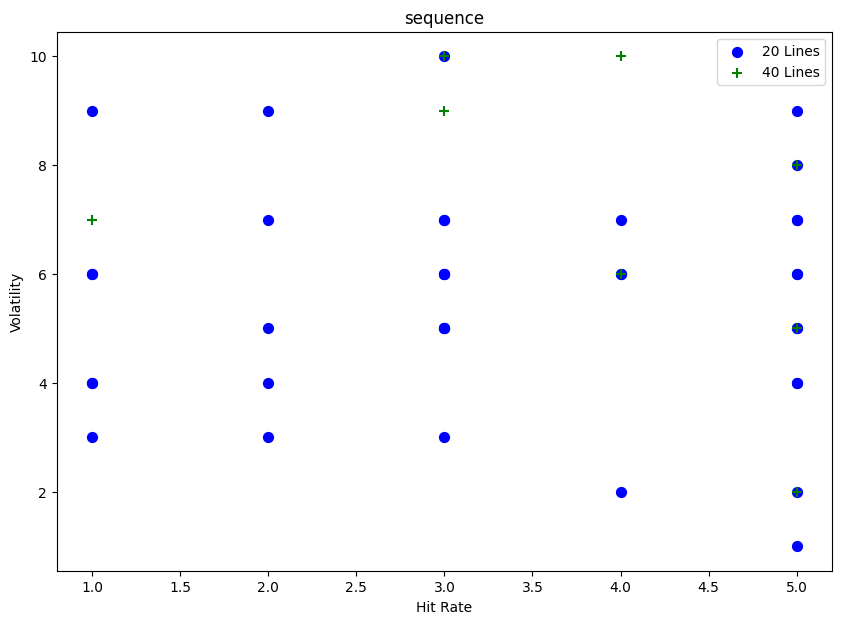

In [295]:
def plot_scatter_chart(df1,theme):
    lines20 = df1[(df1.theme == theme) & (df1.lines == 20)]
    lines40 = df1[(df1.theme == theme) & (df1.lines == 40)]
    matplotlib.rcParams["figure.figsize"] = (10,7)
    plt.scatter(lines20.hitrate, lines20.rating, color = 'blue', label = '20 Lines', s = 50)
    plt.scatter(lines40.hitrate, lines40.rating, marker = '+', color = 'green', label = '40 Lines', s = 50)
    plt.xlabel("Hit Rate")
    plt.ylabel("Volatility")
    plt.title(theme)
    plt.legend()
    
plot_scatter_chart(df1, "sequence")

Text(0, 0.5, 'Count')

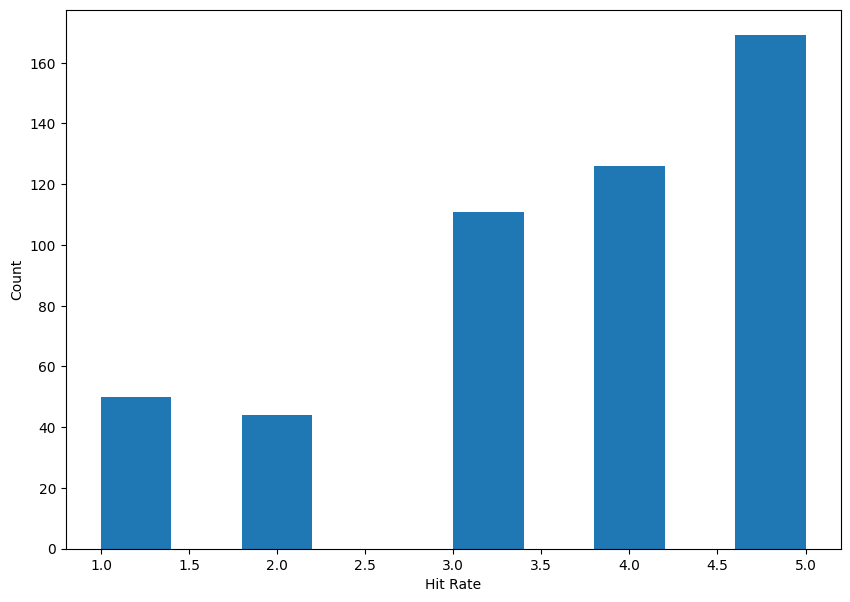

In [296]:
matplotlib.rcParams["figure.figsize"] = (10,7)
plt.hist(df1.hitrate, rwidth=1)
plt.xlabel("Hit Rate")
plt.ylabel("Count")

In [297]:
dummies = pd.get_dummies(df1.theme)
dummies

,asian,casual,magic,sequence
0,False,False,False,True
1,False,True,False,False
2,False,False,True,False
3,True,False,False,False
4,True,False,False,False
...,...,...,...,...
495,False,True,False,False
496,False,False,False,True
497,False,False,False,True
498,False,True,False,False


In [298]:
df2 = pd.concat([df1, dummies.drop('sequence', axis = 'columns')], axis = 'columns')
df2

,lines,volatility,hitrate,theme,rating,asian,casual,magic
0,20,1,5,sequence,6,False,False,False
1,20,3,5,casual,7,False,True,False
2,20,5,2,magic,6,False,False,True
3,10,3,2,asian,1,True,False,False
4,243,1,5,asian,7,True,False,False
...,...,...,...,...,...,...,...,...
495,117649,4,5,casual,5,False,True,False
496,30,1,4,sequence,6,False,False,False
497,50,4,4,sequence,5,False,False,False
498,10,2,5,casual,9,False,True,False


In [299]:
df3 = df2.drop('theme', axis = 'columns')
df3

,lines,volatility,hitrate,rating,asian,casual,magic
0,20,1,5,6,False,False,False
1,20,3,5,7,False,True,False
2,20,5,2,6,False,False,True
3,10,3,2,1,True,False,False
4,243,1,5,7,True,False,False
...,...,...,...,...,...,...,...
495,117649,4,5,5,False,True,False
496,30,1,4,6,False,False,False
497,50,4,4,5,False,False,False
498,10,2,5,9,False,True,False


In [300]:
df3.shape

(500, 7)

In [301]:
X = df3.drop('rating', axis = 'columns')
X

,lines,volatility,hitrate,asian,casual,magic
0,20,1,5,False,False,False
1,20,3,5,False,True,False
2,20,5,2,False,False,True
3,10,3,2,True,False,False
4,243,1,5,True,False,False
...,...,...,...,...,...,...
495,117649,4,5,False,True,False
496,30,1,4,False,False,False
497,50,4,4,False,False,False
498,10,2,5,False,True,False


In [302]:
y = df3.rating
y

0      6
1      7
2      6
3      1
4      7
      ..
495    5
496    6
497    5
498    9
499    5
Name: rating, Length: 500, dtype: int32

In [303]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [304]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.02126910015262584

In [305]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)

cross_val_score(LinearRegression(), X, y, cv = cv)

array([-0.0817912 , -0.03533148, -0.04243025, -0.03134748, -0.03282483])

In [306]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                #'normalize': [True, False]
            }
        },
        'lasso' : {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X, y)

C:\Users\kichu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kichu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kichu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\kichu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

,model,best_score,best_params
0,linear_regression,-0.044745,{}
1,lasso,-0.021010,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,-0.612954,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [313]:
lasso_clf = Lasso()
lasso_clf.fit(X_train, y_train)

def predict_rating(theme, lines, volatility, hitrate):
    theme_index = np.where(X.columns == theme)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = lines
    x[1] = volatility
    x[2] = hitrate
    if theme_index >= 0:
        x[theme_index] = 1

    return lasso_clf.predict([x])[0]

predict_rating('casual', 10, 1, 4)

C:\Users\kichu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


5.7383696435835185